# Regression

## K-최근접 이웃 회귀

### 생선 데이터 가져오기 

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 
                        19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 
                        22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 
                        24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 
                        27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 
                        40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0,197.0,
                         218.0,300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0,685.0, 700.0, 700.0,
                         690.0, 900.0, 650.0, 820.0, 850.0, 900.0,
                         1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])


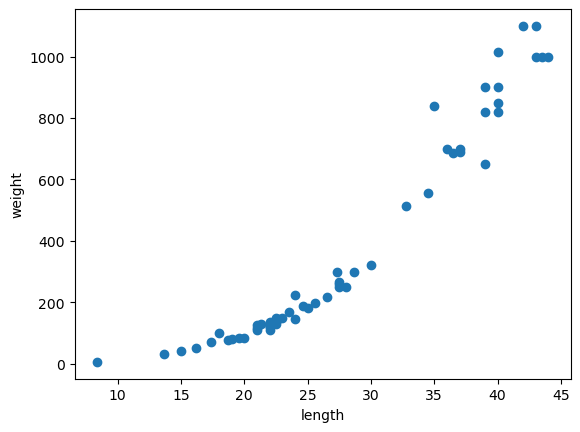

In [3]:
# 산점도 그려서 확인
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 훈련세트와 테스트 세트 준비

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

print(train_input.shape, test_input.shape)

# reshape(-1, 1): -1 -> 행의 크기를 자동 지정
train_input = train_input.reshape(-1, 1) # 2차원 배열로 변경
test_input = test_input.reshape(-1, 1) # 2차원 배열로 변경

print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


### K-최근접 이웃 회귀 알고리즘 정확도 계산 ($R^2$)


In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

print(f"knr.score: {knr.score(train_input, train_target)}")
print(f"test.score: {knr.score(test_input, test_target)}")

knr.score: 0.9698823289099254
test.score: 0.992809406101064


### 평균 절대 오차


In [6]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


### 과대적합 vs 과소적합

In [7]:
print(f"knr.score_train: {knr.score(train_input, train_target)}")
print(f"knr.score_test: {knr.score(test_input, test_target)}")

# 이웃의 갯수를 3으로 설정
knr.n_neighbors = 3

# 모델 다시 훈련
knr.fit(train_input, train_target)

print(f"knr.score_train_new: {knr.score(train_input, train_target)}")
print(f"knr.score_test_new: {knr.score(test_input, test_target)}")

knr.score_train: 0.9698823289099254
knr.score_test: 0.992809406101064
knr.score_train_new: 0.9804899950518966
knr.score_test_new: 0.9746459963987609


### 이웃의 수에 따른 그래프 비교

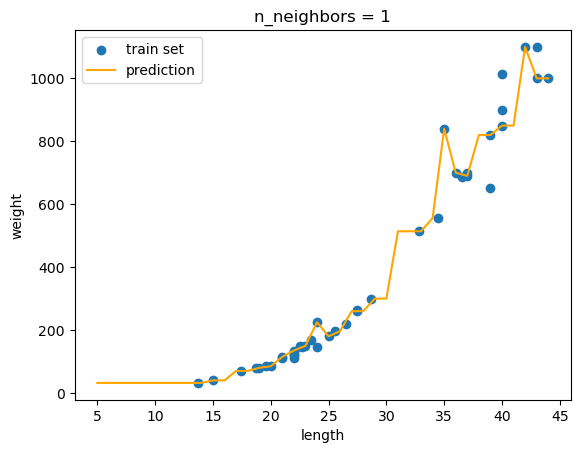

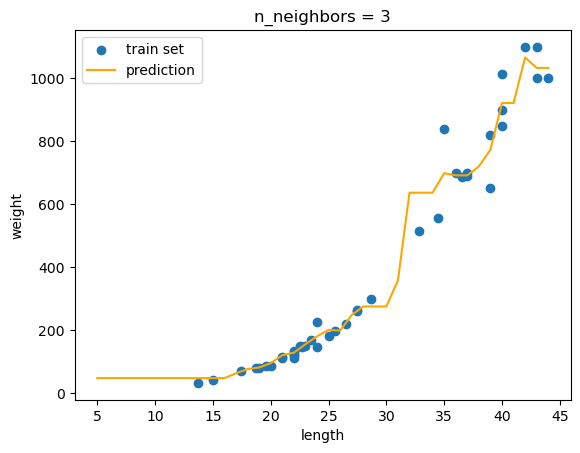

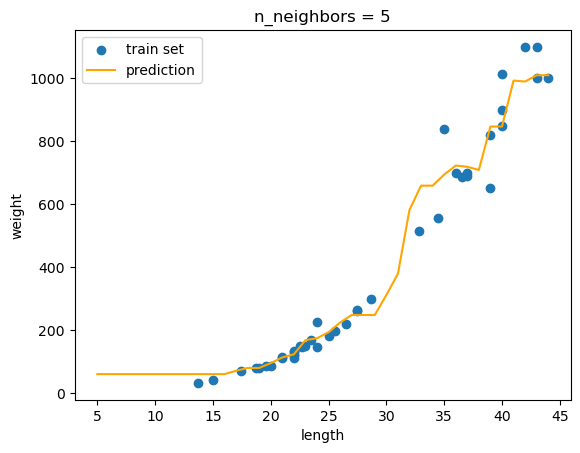

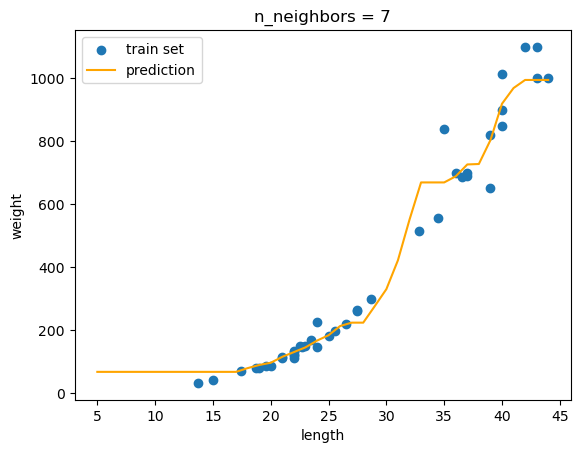

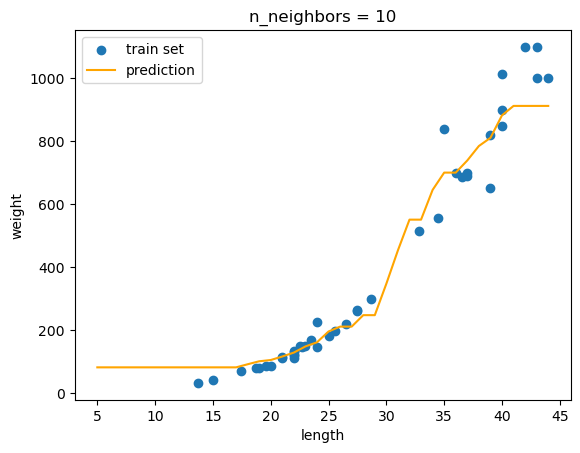

In [8]:
# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()
# x:농어의 길이(5 ~ 45까지 범위 설정)
x = np.arange(5, 45).reshape(-1, 1)

# n=1, 5, 10일때 예측 결과 그래프
for n in [1, 3, 5, 7, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x(농어의 길이)에 대한 농어 무게 예측하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target, label='train set')
    plt.plot(x, prediction, label='prediction', color='orange')
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.legend()
    plt.show()

### k-최근접 이웃 알고리즘 문제점

In [17]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print('50cm:', knr.predict([[50]]))
print('100cm:', knr.predict([[100]]))

50cm: [1033.33333333]
100cm: [1033.33333333]


### 50cm, 100cm 길이의 농어의 이웃 및 산점도 비교

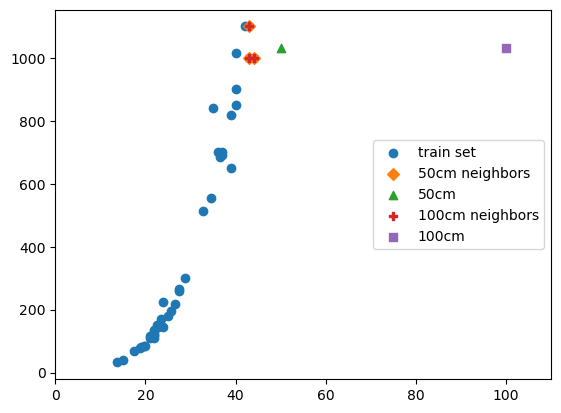

In [10]:
distance_50, indexes_50 = knr.kneighbors([[50]])
distance_100, indexes_100 = knr.kneighbors([[100]]) 

plt.scatter(train_input, train_target, label = "train set")

plt.scatter(train_input[indexes_50], train_target[indexes_50],
           marker = "D", label = "50cm neighbors")
plt.scatter(50, 1033, marker = "^", label = "50cm")

plt.scatter(train_input[indexes_100], train_target[indexes_100],
           marker="P", label = "100cm neighbors")
plt.scatter(100, 1033, marker = "s", label = "100cm")

plt.xlim(0, 110)
plt.legend(loc = 5)
plt.show()

## 선형회귀 

### 훈련 데이터를 이용한 직선 방정식 구하기

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print('50cm: ', lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

50cm:  [1241.83860323]
[39.01714496] -709.0186449535477


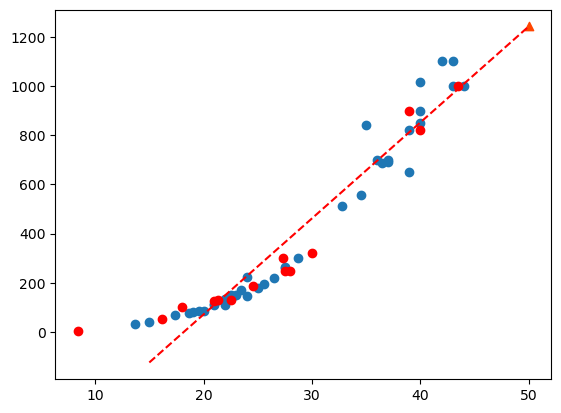

train data score:  0.939846333997604
test data score:  0.8247503123313558


In [19]:
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target, color = "red")

plt.plot(
    [15,50], [15*lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_],
    color = "red", linestyle = "--"
)

plt.scatter(50, 1241.8, marker="^", color = "orangered")
plt.show()

print("train data score: ", lr.score(train_input, train_target))
print("test data score: ", lr.score(test_input, test_target))

### 훈련 세트에 데이터 추가

In [20]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly[0:5])
print(train_poly.shape, test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
(42, 2) (14, 2)


### 다항 회귀식 구하기

In [21]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827
